# Portfolio Theory and Its Application in Python


The main purpose of portfolio formation is to allocate funds to different financial assets and to try to minimize the risk through diversification or optimization. Portfolio management is a dynamic investment management process that aims to allocate the funds held by the investor to existing financial asset alternatives in such a way to provide the highest return given a certain risk level.

The purpose of portfolio management is to decide which assets to include into the portfolio in the context of the decision maker's attitude towards risk and return and which assets to withdraw from the portfolio depending on the time-varying  conditions. To address this issue, we are about to discuss `Markowitz` Portfolio Theory.

## Introduction to Main Concepts for Portfolio Optimization

Managing asset amounts to managing risk but having many assets does not increase the types of risk that investor faces as there are two types of risks, which are `systematic` and `unsystematic`. With that being said, I do not imply that investor's risk level stays the same. In contrast, once investor has many assets, she tends to be more vulnerable to an changes in the source of risk. Let's make it clear.

Now consider we have a bunch of stocks called `portfolio` and each has different susceptibility to risk such as internal weakness, management failure, shock in interest rate, any annoucements and so on. As long as `idiosyncratic` risk affects the stock in our portfolio in a different scale, we can decrease the porfolio risk to a certain level. 

For instance, a new tax imposed on mobile telecomunication might severely affect the stock price of telecom companies but how about the companies operating outside the telecomunication sector? This imposed tax facilitates people to use some internet-based applications like whatsapp, facetime etc. for communication. This, in turn, boosts the stock price of companies selling these apps. 

Thus, if we have more than one stock in our portfolio, we are able to offset the risk. This strategy is refered to as `diversification`. By diversification, we can reduce the risk to a certain level but note that cannot make it completely go away. 

However, if the source of risk is common to all stocks in our portfolio, even diversification cannot help us to eliminate risk. Now, why don't we differentiate risk based on its diversifiability:

* If a risk can be eliminated by diversification, it is called unsystematic or idiosyncratic or diversifiable risk. 
* If a risk cannot be eliminated by diversification, it is called  systematic

In summary, diversification is a way to eliminate risk. At this point, the next question is what is the acceptable risk? We cannot address this question simply by focusing solely on the risk but risk-return relationship can whisper us valuable information.

Intuitively, risk and return is positively related, that is, an increase in risk leads to an increase in return. The more risk an investor can bear, the more likely she gets higher return. So, the return is a function of risk.

Before digging into, let's briefly discuss the main statistics that is used in portfolio optimization:
* Expected portfolio mean
* Portfolio variance
* Portfolio standard deviation

Formula for daily portfolio mean is:


\begin{align}\mu_p&=\mathbb{E}(\sum_i^n w_ir_i)\\
        &=\sum_i^n w_i\mathbb{E}(r_i)\\
        &=\sum_i^n w_i \mu_i\\
        &=w^T\mu\end{align}



To obtain the portfolio standard deviation, we should calculate the variance of a portfolio. The portfolio variance calculation is somewhat different from that of single asset as we are dealing with many asssets, the covariance between them should be taken into account. Let us assume that we have two assets and portfolio return is:

$$ r_p=w_ar_a+w_br_b$$

where $w_a$ and $w_b$ denotes weigths of the corresponding return of stock a and stock b, respectively. If we take the variance of both sides, it turns out:

$$ \sigma^2_p=w_a^2\sigma^2_a+w^2_b\sigma^2_b+2w_aw_b\text{Cov}(r_a,r_b)$$

Taking square root of the variance obtained above gives us the portfolio standard deviation:

$$\sigma_p=\sqrt{\sigma^2_p}$$

In matrix notation:


\begin{align}\sigma^2_p&=\mathbb{E}(r-\mu)^2\\
&=\sum_i^n\sum_j^n w_iw_j \sigma_{ij}\\
&=w^T \Sigma w \end{align}


## Markowitz's Portfolio Theory and Application with Python

`Mean-Variance Portfolio Theory` (MPT), proposed by Markowitz, is the main building block of modern portfolio optimization. Markowitz defines return on investment using expected value of its possible returns and he employed variance to reckon risk. At his time around 1950s, this approach was a brand new one since risk was perceived as the likelihood of losses not the volatility of returns. This intuitive idea have made the applicability of mathematical statistic possible in finance.

Thus, the portfolio problem is reduced to as the trade-off problem of between portfolio mean and variance of the assets, and MPT suggests that given the same level of risk low risk should be preferred among fixed risk securities and high expected return and fixed expected return securities.

As much as modern portfolio theory is based on MPT, MPT is also based on diversification to achieve, given a certain level of risk, a minimal portfolio risk or maximal portfolio returns.

Let's now calculate these basic portfolio statistics via real data that we have used in CAPM and APT lesson for an arbitrarily selected time period:

In [1]:
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
stocks = ['CMCSA', 'T', 'VZ']
start = datetime.datetime(2010,1, 1)
end = datetime.datetime(2020, 4, 4)
stock_data = yf.download(stocks, start=start, end=end, interval='1d')['Close']

[*********************100%***********************]  3 of 3 completed


In [3]:
stock_data.head()

,CMCSA,T,VZ
Date,,,
2009-12-31,8.430,21.170694,31.072264
2010-01-04,8.485,21.586103,31.212946
2010-01-05,8.370,21.480364,31.269218
2010-01-06,8.310,20.853474,29.937416
2010-01-07,8.485,20.619335,29.759218


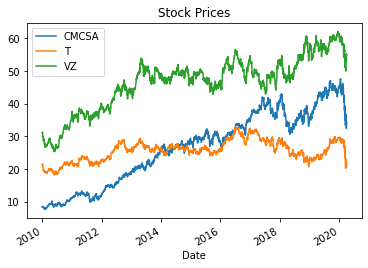

In [4]:
stock_data.plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.show()

As we use log returns to calculate the mean and variance, we first need to have log returns:

In [5]:
import numpy as np
returns = np.log(stock_data/stock_data.shift(1))

In [6]:
returns.dropna(inplace=True)

In [7]:
returns.describe()

,CMCSA,T,VZ
count,2581.000000,2581.000000,2581.000000
mean,0.000540,-0.000008,0.000219
std,0.014884,0.011999,0.011269
min,-0.087358,-0.096963,-0.068498
25%,-0.007174,-0.005546,-0.006022
50%,0.000809,0.000668,0.000564
75%,0.008578,0.006326,0.006409
max,0.118355,0.095513,0.073995


In order to measure the portfolio performance, there are different measures out there. Of them, we will introduce `Sharpe` and `Treynor` ratios.

`Sharpe` ratio is a method developed to gauge the risk-return combinations. In the numerator of the formula, portfolio return is subtracted from risk free rate and therefore it is known as risk-adjusted method. Shortly, it tells that given the volatility how much extra return investor receives. The formula is as follows:

$$\text{Sharpe ratio}=\frac{r_i-r_f}{\sigma(r_i)}$$

where $r_i$ is the $i^{th}$ stock return (or it can be portfolio return), $r_f$ is the risk free rate and finally $\sigma(r_i)$ is the standard deviation of $i^{th}$ stock. 

`Treynor` ratio, on the other hand, shows given the level of systematic risk, how much return an investor has. The formula of Treynor ratio is:

$$\text{Treynor ratio}=\frac{r_i-r_f}{\beta_i}$$

We will continue with Sharpe ratio. For the sake of simplicity, let us assume that risk free rate is zero.

## Portfolio Optimization via Optimization Algorithm

In this part, we are going to apply mathematical optimization to find the optimum portfolio. Sharpe ratio is the metric that the optimization will be based on. Here are the steps to be followed in this optimization process:
* Define the function as get_opt as pass in weights
* Calculate the return, volatility, and Sharpe Ratio
* Return an array of return, volatility, and the Sharpe Ratio

As we derive the portfolio standard deviation, we see that covariance has an important role. So, we should have it along with the mean of the portfolio:

In [8]:
returns.mean() * 252# number of business days in a year

CMCSA    0.136017
T       -0.002006
VZ       0.055218
dtype: float64

In [9]:
returns.cov() * np.sqrt(252)

,CMCSA,T,VZ
CMCSA,0.003517,0.001412,0.001177
T,0.001412,0.002286,0.001496
VZ,0.001177,0.001496,0.002016


Let's get started with defining the function by passing the weights:

In [10]:
def get_opt(weights):
    weights = np.array(weights)
    ret = np.sum(returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * np.sqrt(252), weights)))
    sharpe = ret / vol
    return np.array([ret, vol, sharpe])

We're then going to import the minimize optimization algorithm from `scipy`

In [11]:
from scipy.optimize import minimize

As we find the minimize sharpe ratio, we need to define it.

In [12]:
def neg_sharpe(weights):
    return get_opt(weights)[2] * -1

Let us now define the the constraints called `const_sum()`. Please note that our allocations need to add up to one.

$$\Sigma_i \omega_i=1$$

$$\Sigma_i \omega_i-1=0$$

In [13]:
def const_sum(weights):
    return np.sum(weights)-1

In [14]:
cons = ({'type':'eq', 'fun':const_sum})

In [15]:
bounds = ((0, 1), (0, 1), (0, 1))

As we have only one constraint, let's create a variable called `cons`, which is a tuple with a dictionary inside of it.

The dictionary takes in a first argument `type`: `eq`—this says it's going to be an equation type of constraint. The second argument is a function and we pass in the function itself `fun`:`const_sum`:

In [16]:
init_guess = [0.33, 0.33, 0.34]

In [17]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints= cons)

As a final step, we need to create an initial guess to start with, and usually, the best initial guess is just an even distribution:

In [18]:
opt_results

     fun: -2.3061823338515723
     jac: array([ 5.61773777e-05,  1.15949667e+00, -3.46213579e-04])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.86031853, 0.        , 0.13968147])

In [19]:
opt_results.x

array([0.86031853, 0.        , 0.13968147])

For more information about `minimize` package, please see [this guide.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

In [20]:
get_opt(opt_results.x)

array([0.12473068, 0.05408535, 2.30618233])

The optimal results are stored in the x array so we call `opt_results.x` and with get_opt(opt_results.x) we can see the optimal results we can get is a Sharpe Ratio of 2.3.